In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import strucfunc
from strucfunc import sosflog

import pickle
import json



In [3]:
reg = 'CarC'
dist = 2130 #parsecs

In [4]:
pc = dist*(2*np.pi) / (360 * 60 * 60)
pc

0.010326531407633116

In [5]:
pickle_in = open('VF//' + reg + '.pkl',"rb")
Car = pickle.load(pickle_in)
Car

,X,Y,RV
0,160.9408,-59.51381,-7.175543
1,161.2433,-59.55172,-7.391660
2,161.2100,-59.59631,-9.893945
3,161.1413,-59.58192,-22.703236
4,161.3221,-59.70569,-12.487097
...,...,...,...
861,160.9409,-59.55744,-6.430415
862,160.9275,-59.54794,-8.695479
863,160.8832,-59.56567,-8.319904
864,160.9601,-59.56681,-9.309055


In [6]:
sig = Car.RV.std()
sig2 = sig**2

In [7]:
Car.X = Car.X*3600
Car.Y = Car.Y*3600

In [8]:
table = sosflog(Car,0.125)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


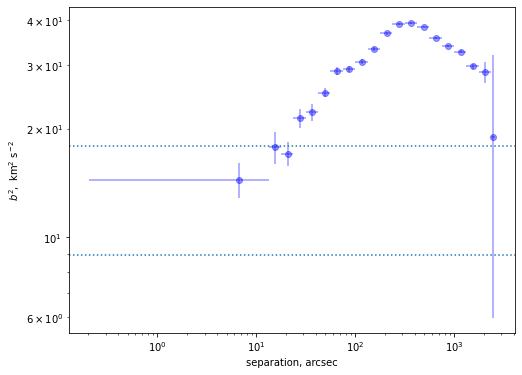

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)
#ax.plot(s, b2, 'o')
ax.axhline(sig2, ls=':')
ax.axhline(0.5*sig2, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
#sgrid = np.logspace(1.0, 3.0)
#ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None


In [10]:
Car = { 'sfdata' : table.to_json(),
        'sig2' : sig2}

In [11]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [12]:
jsonfilename = f'SFresults//' + reg +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

SFresults//CarC.json

In [13]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 4.939105749130249 seconds ---
